<a href="https://colab.research.google.com/github/MichaelCCCC/Portfolio-Returns/blob/master/Portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Stock Analysis for Top sell recommendations in a SCMP article**
link: https://www.scmp.com/business/money/markets-investing/article/1565725/analysts-pick-top-five-hong-kong-listed-stocks-buy

Description:

This is a python program for finance.
This program will show you the portfolio of the top sell recommendation simple returns, daily returns and volatility etc. It aims at finding outing whether it was a good idea to follow these recommandations back in 2014.

### **Import the libraries**

In [0]:
from datetime import datetime
import numpy as np
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### **Get stock price from *yahoo finance***

They are the top sell recommendations from a SCMP article

link: https://www.scmp.com/business/money/markets-investing/article/1565725/analysts-pick-top-five-hong-kong-listed-stocks-buy

In [0]:
#Get the stock symbols for the portfolio
stockSymbols = ["0992.HK", "0867.HK", "0981.HK", "0322.HK", "0151.HK"]

In [0]:
#Get the stock starting date
stockStartDate = '2014-08-04'

In [4]:
#Get the stock ending date
stockEndDate = '2016-08-04'

stockEndDate

'2016-08-04'

In [5]:
#Get the number of assets in the portfolio
numAssets = len (stockSymbols)
print('You have '+str(numAssets)+' assets in your portfolio')

You have 5 assets in your portfolio


In [0]:
#Create a function to get the stock prices in the portfolio
def getMyPortfolio(stocks=stockSymbols, start=stockStartDate, end=stockEndDate, col='Adj Close'):
  data = web.DataReader(stocks, data_source='yahoo', start=start, end=end)[col]
  return data

In [7]:
#Get the stock portfolio Adj. Close price
my_stocks = getMyPortfolio(stockSymbols)
my_stocks

Symbols,0992.HK,0867.HK,0981.HK,0322.HK,0151.HK
Date,,,,,
2014-08-04,8.248779,8.206520,7.2,20.384312,9.466904
2014-08-05,8.357314,8.302756,7.3,20.567539,9.396255
2014-08-06,8.403831,8.398995,7.2,20.659155,9.590539
2014-08-07,8.496861,8.591474,6.7,20.521732,9.590539
2014-08-08,8.558882,8.495234,6.9,20.521732,9.590539
...,...,...,...,...,...
2016-08-01,4.256111,10.695019,6.5,6.426560,4.486817
2016-08-02,4.256111,10.695019,6.5,6.426560,4.486817
2016-08-03,4.239355,10.840034,6.5,6.225730,4.349465


In [0]:
#Create a function to visualize the portfolio
def showGraph(stocks=stockSymbols, start=stockStartDate, end=stockEndDate, col='Adj Close'):
  
  #Create a title for the portfolio
  title = 'Portfolio '+col+' Price History'
  
  #Get the stocks
  my_stocks = getMyPortfolio(stocks=stocks, start=start, end=end, col=col)

  #Give the figure size
  plt.figure(figsize=(12.2, 4.5)) 

  #Loop through each stock and plot the price
  for c in my_stocks.columns.values:
    plt.plot(my_stocks[c], label=c)
  
  plt.title(title)
  plt.xlabel('Date', fontsize = 18)
  plt.ylabel('Adj Close Price USD ($)', fontsize = 18)
  plt.legend(my_stocks.columns.values, loc='upper left')
  plt.show()

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


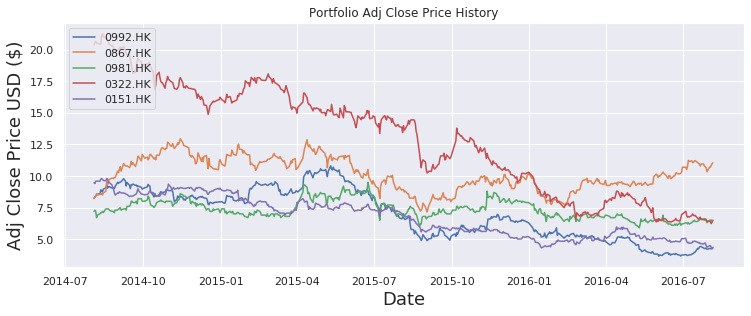

In [9]:
#Show the adjusted close price for #FAANG
showGraph(stockSymbols)

### **Compute the daily simple returns**

In [10]:
#Calculate the simple returns
daily_simple_returns = my_stocks.pct_change(1)

#Show the daily simple returns
daily_simple_returns

Symbols,0992.HK,0867.HK,0981.HK,0322.HK,0151.HK
Date,,,,,
2014-08-04,NaN,NaN,NaN,NaN,NaN
2014-08-05,0.013158,0.011727,0.013889,0.008989,-0.007463
2014-08-06,0.005566,0.011591,-0.013699,0.004454,0.020677
2014-08-07,0.011070,0.022917,-0.069444,-0.006652,0.000000
2014-08-08,0.007299,-0.011202,0.029851,0.000000,0.000000
...,...,...,...,...,...
2016-08-01,0.011952,0.035088,0.031746,0.001490,0.031579
2016-08-02,0.000000,0.000000,0.000000,0.000000,0.000000
2016-08-03,-0.003937,0.013559,0.000000,-0.031250,-0.030612


### **Visualize the volatility of each stock**

In [11]:
#Show the variance
daily_simple_returns.var()

Symbols
0992.HK    0.000607
0867.HK    0.000615
0981.HK    0.000728
0322.HK    0.000515
0151.HK    0.000341
dtype: float64

In [12]:
#Print the standard deviation for daily simple returns
print("The Stock Volatility:")
daily_simple_returns.std()

The Stock Volatility:


Symbols
0992.HK    0.024643
0867.HK    0.024808
0981.HK    0.026985
0322.HK    0.022690
0151.HK    0.018465
dtype: float64

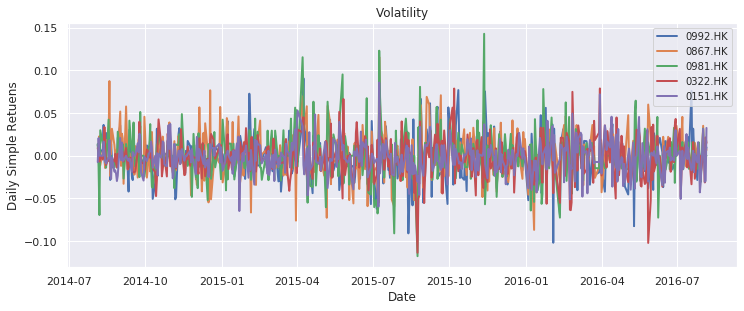

In [13]:
#Visualize the stocks daily simple returns / Volatility
plt.figure(figsize=(12, 4.5))

#Loop through each stock and plot simple returns
for c in daily_simple_returns.columns.values:
  plt.plot(daily_simple_returns.index, daily_simple_returns[c], lw=2, label=c)

#Create a legend
plt.legend(loc='upper right', fontsize = 10)
plt.title('Volatility')
plt.xlabel('Date')
plt.ylabel('Daily Simple Retuens')
plt.show()

### **Get the mean daily and yearly return of each stock**

In [14]:
#Show the mean of daily simple return
dailyMeanSimpleReturns = daily_simple_returns.mean()

print("The daily mean simple return:")
print(dailyMeanSimpleReturns)

The daily mean simple return:
Symbols
0992.HK   -0.001009
0867.HK    0.000905
0981.HK    0.000154
0322.HK   -0.002062
0151.HK   -0.001396
dtype: float64


In [15]:
#Show the mean of yearly simple return
print("The yearly mean simple return:")
print(dailyMeanSimpleReturns * 253)

The yearly mean simple return:
Symbols
0992.HK   -0.255200
0867.HK    0.229040
0981.HK    0.038938
0322.HK   -0.521647
0151.HK   -0.353084
dtype: float64


### **Compute the profitability of a portfolio with 20% of each stocks**

In [16]:
#Calculate the expected portfolio daily return
Weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2]) #20% for each stock

portfolioSimpleReturn = np.sum(dailyMeanSimpleReturns * Weights)

#Print the expected portfolio return
print("The daily expected portfolio return: " + str(portfolioSimpleReturn))

The daily expected portfolio return: -0.000681385132216832


In [17]:
#Get the yearly simple return
print("Expected annualised portfolio simple return: " + str(portfolioSimpleReturn * 253))

Expected annualised portfolio simple return: -0.1723904384508585


In [18]:
#Calculate the growth of the investment
dailyCumulSimpleReturn = (daily_simple_returns+1).cumprod()

#Show the cumulative simple returns
dailyCumulSimpleReturn

Symbols,0992.HK,0867.HK,0981.HK,0322.HK,0151.HK
Date,,,,,
2014-08-04,NaN,NaN,NaN,NaN,NaN
2014-08-05,1.013158,1.011727,1.013889,1.008989,0.992537
2014-08-06,1.018797,1.023454,1.000000,1.013483,1.013060
2014-08-07,1.030075,1.046908,0.930556,1.006741,1.013060
2014-08-08,1.037594,1.035181,0.958333,1.006741,1.013060
...,...,...,...,...,...
2016-08-01,0.515969,1.303234,0.902778,0.315270,0.473948
2016-08-02,0.515969,1.303234,0.902778,0.315270,0.473948
2016-08-03,0.513937,1.320905,0.902778,0.305418,0.459439


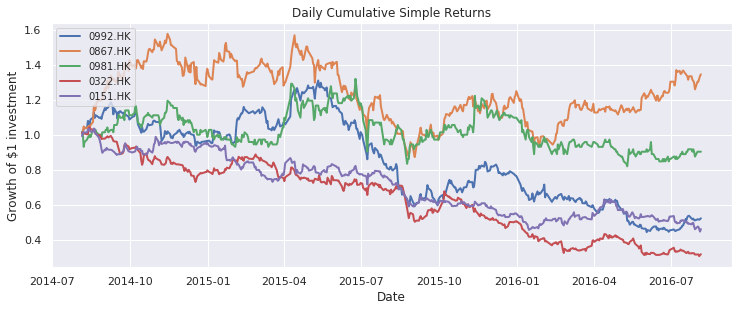

In [19]:
#Visualize the daily cumulative simple returns

plt.figure(figsize=(12.2, 4.5))
for c in dailyCumulSimpleReturn.columns.values:
  plt.plot(dailyCumulSimpleReturn.index, dailyCumulSimpleReturn[c], lw=2, label=c)

plt.legend(loc='upper left', fontsize = 10)
plt.xlabel('Date')
plt.ylabel('Growth of $1 investment')
plt.title('Daily Cumulative Simple Returns')
plt.show()